# Chapter 1

##  Data structures

###  Series

The Series is a one-dimensional array that can store various data types, including mix data types. The row labels
in a Series are called the index. Any list, tuple and dictionary can be converted in to Series using ‘series’ method.

In [1]:
import pandas as pd
 
h = ('AA', '2012-02-01', 100, 10.2)
s = pd.Series(h)

# converting tuple to Series

In [2]:
type(s)

pandas.core.series.Series

In [3]:
print(s)

0            AA
1    2012-02-01
2           100
3          10.2
dtype: object


In [4]:
 # converting dict to Series
d = {'name' : 'IBM', 'date' : '2010-09-08', 'shares' : 100, 'price' : 10.2}
ds = pd.Series(d)

In [5]:
 type(ds)

pandas.core.series.Series

In [6]:
 print(ds)

name             IBM
date      2010-09-08
shares           100
price           10.2
dtype: object


In [7]:
f = ['FB', '2001-08-02', 90, 3.2]
f = pd.Series(f, index = ['name', 'date', 'shares', 'price'])
print(f)

name              FB
date      2001-08-02
shares            90
price            3.2
dtype: object


In [9]:
f[0]

'FB'

In [10]:
f['price']

3.2

### DataFrame 

DataFrame is the widely used data structure of pandas. Note that, Series are used to work with one dimensional array, whereas DataFrame can be used with two dimensional arrays. DataFrame has two different index i.e. column-index and row-index.
The most common way to create a DataFrame is by using the dictionary of equal-length list as shown below. Further, all the spreadsheets and text files are read as DataFrame, therefore it is very important data structure of pandas.

In [11]:
data = { 'name' : ['AA', 'IBM', 'GOOG'],
    'date' : ['2001-12-01', '2012-02-10', '2010-04-09'],
    'shares' : [100, 30, 90],
    'price' : [12.3, 10.3, 32.2]}

In [12]:
df = pd.DataFrame(data)

In [13]:
type(df)

pandas.core.frame.DataFrame

In [15]:
df

,name,date,shares,price
0,AA,2001-12-01,100,12.3
1,IBM,2012-02-10,30,10.3
2,GOOG,2010-04-09,90,32.2


Additional columns can be added after defining a DataFrame

In [16]:
df['owner'] = 'Unknown'
df

,name,date,shares,price,owner
0,AA,2001-12-01,100,12.3,Unknown
1,IBM,2012-02-10,30,10.3,Unknown
2,GOOG,2010-04-09,90,32.2,Unknown


Currently, the row index are set to 0, 1 and 2. These can be changed using ‘index’ attribute

In [17]:
df.index = ['one', 'two', 'three']
df

,name,date,shares,price,owner
one,AA,2001-12-01,100,12.3,Unknown
two,IBM,2012-02-10,30,10.3,Unknown
three,GOOG,2010-04-09,90,32.2,Unknown


Further, any column of the DataFrame can be set as index using ‘set_index()’ attribute.

In [18]:
df = df.set_index(['name'])
df

,date,shares,price,owner
name,,,,
AA,2001-12-01,100,12.3,Unknown
IBM,2012-02-10,30,10.3,Unknown
GOOG,2010-04-09,90,32.2,Unknown


Data can be accessed in two ways i.e. using row and column index

In [19]:
 # access data using column-index
df['shares']

name
AA      100
IBM      30
GOOG     90
Name: shares, dtype: int64

In [20]:
 # access data by row-index
df.ix['AA']

AttributeError: 'DataFrame' object has no attribute 'ix'

In [22]:
# access all rows for a column
df.ix[:, 'name']

# access specific element from the DataFrame,
df.ix[0, 'shares']

AttributeError: 'DataFrame' object has no attribute 'ix'

Any column can be deleted using ‘del’ or ‘drop’ commands.

In [23]:
del df['owner']
df

,date,shares,price
name,,,
AA,2001-12-01,100,12.3
IBM,2012-02-10,30,10.3
GOOG,2010-04-09,90,32.2


In [24]:
df.drop('shares', axis = 1)

,date,price
name,,
AA,2001-12-01,12.3
IBM,2012-02-10,10.3
GOOG,2010-04-09,32.2


# Chapter 2

## Reading files 

In this section, two data files are used i.e. ‘titles.csv’ and ‘cast.csv’. The ‘titles.csv’ file contains the list of movies with the releasing year; whereas ‘cast.csv’ file has five columns which store the title of movie, releasing year, star-casts, type(actor/actress), characters and ratings for actors.

In [27]:
casts = pd.read_csv('casts.csv', index_col=None)
casts

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [28]:
casts.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [30]:
titles = pd.read_csv('titles.csv', index_col =None)
titles.tail()

,title,year
0,Rebel,1970
1,Suzanne,1996
2,Bomba,2013
3,Aao Jao Ghar Tumhara,1984
4,Mrs. Munck,1995


• read_csv : read the data from the csv file.

• index_col = None : there is no index i.e. first column is data

• head() : show only first five elements of the DataFrame

• tail() : show only last five elements of the DataFrame

If there is some error while reading the file due to encoding.

In [31]:
titles = pd.read_csv('titles.csv', index_col=None, encoding='utf-8')

If we simply type the name of the DataFrame (i.e. cast in below code), then it will show the first thirty and last twenty rows of the file along with complete list of columns. This can be limited using ‘set_options’ as below. Further, at the end of the table total number of rows and columns will be displayed.

In [33]:
titles1=pd.set_option('max_rows', 10, 'max_columns', 10)
titles1

OptionError: 'Pattern matched multiple keys'

Note: head() and tail() commands can be used for remind ourselves about the header and contents of the file.
These two commands will show the first and last 5 lines respectively of the file. Further, we can change the total number of lines to be displayed by these commands.

In [34]:
 titles.head(3)

,title,year
0,Rebel,1970
1,Suzanne,1996
2,Bomba,2013


##  Data operations 

### Row and column selection 

Any row or column of the DataFrame can be selected by passing the name of the column or rows. After selecting
one from DataFrame, it becomes one-dimensional therefore it is considered as Series.

• ix : use ‘ix’ command to select a row from the DataFrame.

In [35]:
t = titles['title']
type(t)

pandas.core.series.Series

In [36]:
 t.head()

0                   Rebel
1                 Suzanne
2                   Bomba
3    Aao Jao Ghar Tumhara
4              Mrs. Munck
Name: title, dtype: object

In [37]:
 titles.ix[0]

AttributeError: 'DataFrame' object has no attribute 'ix'

### Filter Data 

Data can be filtered by providing some boolean expression in DataFrame. For example, in below code, movies
which released after 1985 are filtered out from the DataFrame ‘titles’ and stored in a new DataFrame i.e. after85.


In [38]:
 # movies after 1985
after85 = titles[titles['year'] > 1985]
after85.head()

,title,year
1,Suzanne,1996
2,Bomba,2013
4,Mrs. Munck,1995


Note: When we pass the boolean results to DataFrame, then panda will show all the results which corresponds
to True (rather than displaying True and False), as shown in above code. Further, ‘& (and)’ and ‘| (or)’ can be
used for joining two conditions as shown below.

In below code all the movies in decade 1990 (i.e. 1900-1999) are selected. Also ‘t = titles’ is used for simplicity
purpose only.

In [39]:
 # display movie in years 1990 - 1999
t = titles
movies90 = t[ (t['year']>=1990) & (t['year']<2000) ]
movies90.head()

,title,year
1,Suzanne,1996
4,Mrs. Munck,1995


###  Sorting 

Sorting can be performed using ‘sort_index’ or ‘sort_values’ keywords.

In [40]:
 # find all movies named as 'Macbeth'
t = titles
macbeth = t[ t['title'] == 'Macbeth']
macbeth.head()

,title,year


Note that in above filtering operation, the data is sorted by index i.e. by default ‘sort_index’ operation is used as
shown below.

In [41]:
 # by default, sort by index i.e. row header
macbeth = t[ t['title'] == 'Macbeth'].sort_index()
macbeth.head()

,title,year


To sort the data by values, the ‘sort_value’ option can be used. In below code, data is sorted by year now.

In [42]:
 # sort by year
macbeth = t[ t['title'] == 'Macbeth'].sort_values('year')
macbeth.head()

,title,year


###  Null values 

Note that, various columns may contains no values, which are usually filled as NaN. For example, rows 3-4 of casts
are NaN.

In [43]:
 casts.ix[3:4]

AttributeError: 'DataFrame' object has no attribute 'ix'

These null values can be easily selected, unselected or contents can be replaced by any other values e.g. empty
strings or 0 etc. Various examples of null values are shown in this section.


• ‘isnull’ command returns the true value if any row of has null values. Since the rows 3-4 has NaN value,
therefore, these are displayed as True.

In [44]:
c = casts
c['n'].isnull().head()

0    False
1    False
2    False
3     True
4     True
Name: n, dtype: bool

• ‘notnull’ is opposite of isnull, it returns true for not null values

In [45]:
 c['n'].notnull().head()

0     True
1     True
2     True
3    False
4    False
Name: n, dtype: bool

• To display the rows with null values, the condition must be passed in the DataFrame.

In [46]:
 c[c['n'].isnull()].head(3)

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


• NaN values can be fill by using fillna, ffill(forward fill), and bfill(backward fill) etc. In below code,
‘NaN’ values are replace by NA. Further, example of ffill and bfill are shown in later part of the tutorial.

In [47]:
c_fill = c[c['n'].isnull()].fillna('NA')
c_fill.head(2)

,title,year,name,type,character,n
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NA
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NA


###  String operations 

Various string operations can be performed using ‘.str.’ option. Let’s search for the movie “Maa” first.

In [48]:
t = titles
t[t['title'] == 'Maa']

,title,year


There is only one movie in the list. Now, we want to search all the movies which starts with ‘Maa’. The ‘.str.’
option is required for such queries.

In [49]:
 t[t['title'].str.startswith("Maa ")].head(3)

,title,year


### Count Values

Total number of occurrences can be counted using ‘value_counts()’ option. In following code, total number of
movies are displayed base on years.

In [50]:
 t['year'].value_counts().head()

1970    1
1996    1
2013    1
1984    1
1995    1
Name: year, dtype: int64

### Plots 

Pandas supports the matplotlib library and can be used to plot the data as well. In previous section, the total
numbers of movies/year were filtered out from the DataFrame. In the below code, those values are saved in new
DataFrame and then plotted using panda.

<AxesSubplot:>

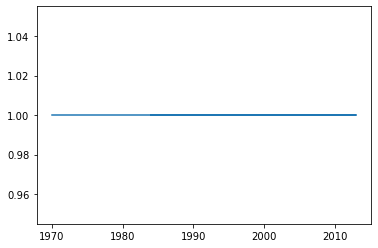

In [51]:
 import matplotlib.pyplot as plt
t = titles
p = t['year'].value_counts()
p.plot()

In [52]:
 plt.show()

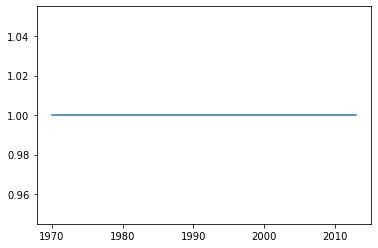

In [53]:
p.sort_index().plot()
plt.show()

##  Groupby 

Data can be grouped by columns-headers. Further, custom formats can be defined to group the various elements
of the DataFrame.

### Groupby with column-names 

In Section Count Values, the value of movies/year were counted using ‘count_values()’ method. Same can be
achieve by ‘groupby’ method as well. The ‘groupby’ command return an object, and we need to an additional
functionality to it to get some results. For example, in below code, data is grouped by ‘year’ and then size()
command is used. The size() option counts the total number for rows for each year; therefore the result of below
code is same as ‘count_values()’ command.


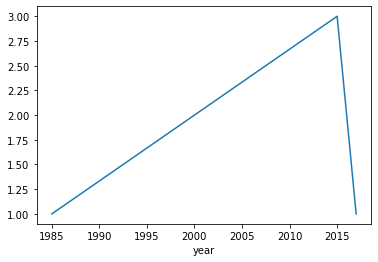

In [54]:
cg = c.groupby(['year']).size()
cg.plot()
plt.show()